In [1]:
import sys
sys.path.append('..')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
from typing import Sequence
import numpy as np
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from sklearn.metrics import mean_squared_error


In [2]:
def reformulate_atom_names(df):
    df_copy = df.copy()
    new_atom_list = []
    orig_atom_name = df['atom_type'].values
    for i in range(len(df_copy)):
        if '_' in orig_atom_name[i]:
            new_atom = orig_atom_name[i].split('_')[1]
        else:
            new_atom = orig_atom_name[i]
        new_atom_list.append(new_atom)
    
    df_copy['atom_type'] = new_atom_list
    return df_copy

In [3]:
# df_C_all = pd.read_csv('dataset/Godess_final_data/visulize/carbon/train_carbon_extra_feature.csv')
df_C_all = pd.read_csv('dataset/Godess_final_data/visulize/carbon/testing_carbon_extra_feature.csv')
df_C_all.columns = ['pred', 'act', 'atom_type', 'glycan_name','difference', 'residue_name']
df_C_all = reformulate_atom_names(df_C_all)
carbon_color_plate = ['#d68c22', '#cb6e34', '#b75540', '#9b4246', '#7b3447', 
                      '#582a40', '#B4C424', '#C9CC3F', '#c0c736']
# carbon_color_plate = ['#03071e', '#370617', '#6a040f', '#9d0208', '#d00000',  
#                       '#dc2f02', '#e85d04', '#f48c06', '#faa307', '#ffba08', '#ff764d']

carbon_name = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
groups_c = df_C_all.groupby('atom_type')
colors_c = dict(zip(carbon_name, carbon_color_plate))


In [4]:
rms = mean_squared_error(df_C_all['act'], df_C_all['pred'], squared=False)

In [5]:
# df_H_all = pd.read_csv('dataset/Godess_final_data/visulize/hydrogen/train_hydrogen_extra_feature.csv')
df_H_all = pd.read_csv('dataset/Godess_final_data/visulize/hydrogen/testing_hydrogen_extra_feature.csv')


# df_H_all = df_H_all.loc[:, ['0', '1', 'atom_type']]
# df_H_all.columns = ['pred', 'act', 'atom_type']
df_H_all.columns = ['pred', 'act', 'atom_type', 'glycan_name','difference', 'residue_name']
df_H_all = reformulate_atom_names(df_H_all)
groups_h = df_H_all.groupby('atom_type')

# hydrogen_name = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9']
hydrogen_name = ['H1', 'H11', 'H2', 'H3', 'H31', 'H4', 'H41', 'H5', 'H51', 'H6',
                 'H61', 'H7', 'H8', 'H81', 'H9', 'H91']

hydrogen_color_plate = ['#22cbd6', '#22cbd6','#00b3cd','#009cc1', '#009cc1','#0084b1','#0084b1',
                        '#066d9f', '#066d9f', '#205689', '#205689', '#2a3f71','#2d2a58', '#2d2a58', 
                        '#22d6c1', '#22d6c1']

# hydrogen_color_plate = [
#     '#87CEFA',
#     '#7BB7FF',
#     '#6E9BFF',
#     '#617FFF',
#     '#5462FF',
#     '#4736FF',
#     '#3A0AFF',
#     '#3000D1',
#     '#2600A3',
#     '#1D0076',
#     '#130049',
#     '#0A0022',
#     '#000000',
#     '#000000'
# ]


colors_h = dict(zip(hydrogen_name, hydrogen_color_plate))

In [6]:
np.unique(df_H_all['atom_type'].values)

array(['H1', 'H11', 'H2', 'H3', 'H31', 'H4', 'H5', 'H51', 'H6', 'H61',
       'H7', 'H8', 'H81', 'H9', 'H91'], dtype=object)

In [7]:
rms_h = mean_squared_error(df_H_all['act'], df_H_all['pred'], squared=False)

In [8]:
def plot_shift(df, ax, i, set_title_name = '', sep = 5, xlab_name = '', ylab_name = '', 
               color = 'grey', groups = None, color_plate_dict = None, ms = 2):
    acctual_shit_1 = df['act'].values
    predict_shit_1 = df['pred'].values
    low_limit = np.min([np.min(np.abs(acctual_shit_1)), np.min(np.abs(predict_shit_1))]) * 0.9
    up_limit = np.max([np.max(np.abs(acctual_shit_1)), np.max(np.abs(predict_shit_1))]) * 1.1

    sns.set_theme()
    sns.set_style("whitegrid")
    x = np.linspace(low_limit, up_limit)
    ax[i].plot(x, x, color=color, alpha=0.25, zorder=0)
    
#     ax[i].scatter(acctual_shit_1, predict_shit_1, s = 20, label = 'A', linewidths=0, color=color)
    for name, group in groups:
        ax[i].plot(group.pred, group.act, marker='o', linestyle='', ms=ms, label=name, color = color_plate_dict[name])
    
    ax[i].ticklabel_format(style="sci", scilimits=(-4, 4))
    ax[i].axis('square')
    
    ax[i].set_title(f'{set_title_name}', size = font_size)
    ax[i].set_ylim(low_limit, up_limit)
    ax[i].set_xlim(low_limit, up_limit)
#     ax[i].grid()
    grid_x_ticks = np.arange(low_limit, up_limit, (up_limit - low_limit) / sep)
    grid_y_ticks = np.arange(low_limit, up_limit, (up_limit - low_limit) / sep)
    
    ax[i].set_xlabel(xlab_name, loc="center", size = font_size)
    ax[i].set_ylabel(ylab_name, loc="center", size = font_size)
#     ax[i].yaxis.set_label_coords(x = y_lab_xcoordinate, y = 0.5)
    
    ax[i].set_xticks(grid_x_ticks , minor=True)
    
    
    ax[i].set_yticks(grid_y_ticks , minor=True)
    
    ax[i].xaxis.set_tick_params(labelsize=ticksize)
    ax[i].yaxis.set_tick_params(labelsize=ticksize)
    
    ax[i].grid(which='both')

    ax[i].grid(which='minor', alpha=1, linestyle='-')
    ax[i].legend(fontsize = 18, markerscale=3)

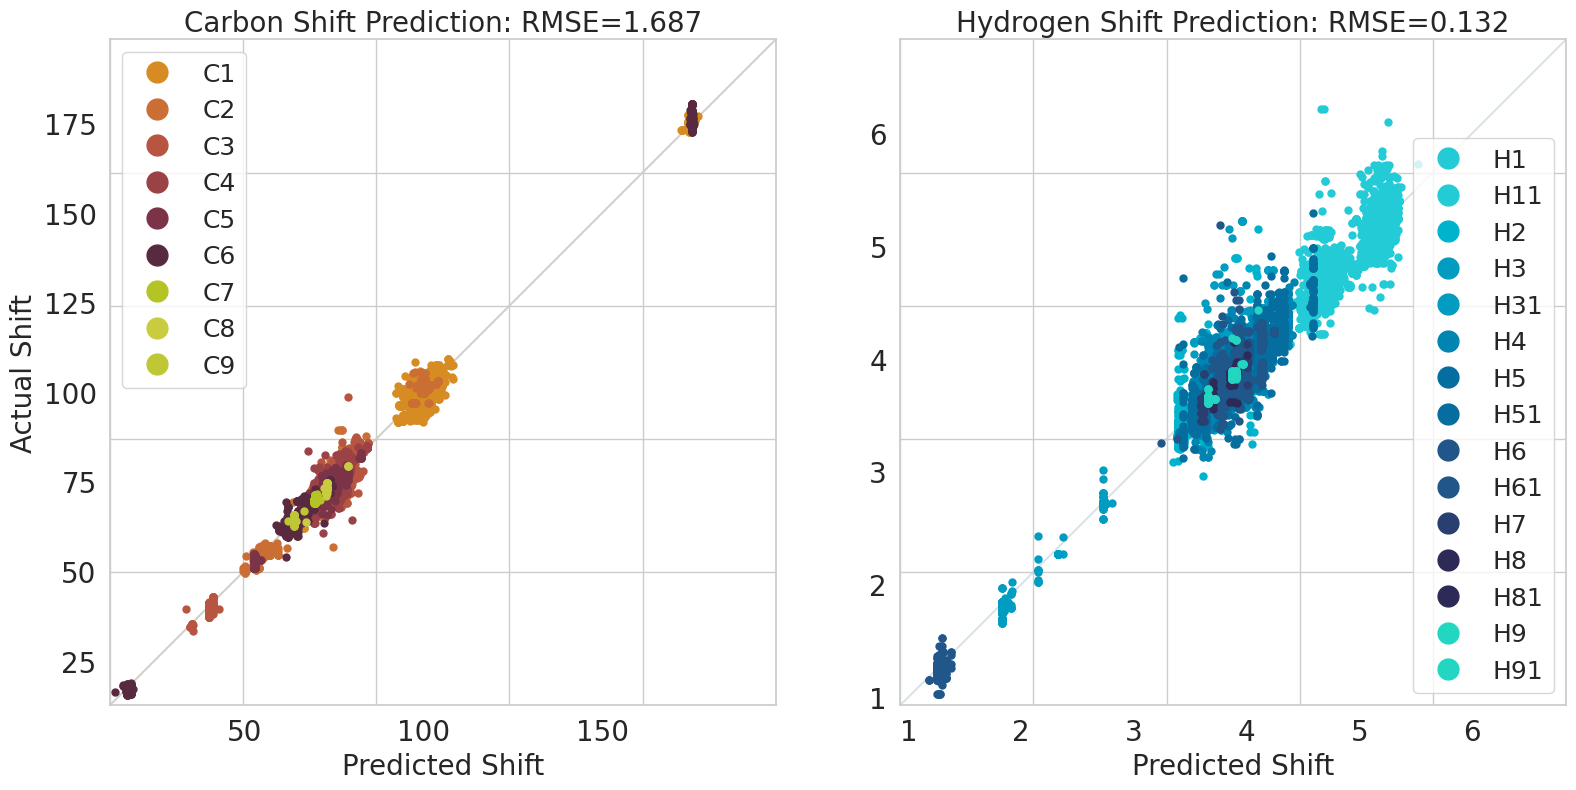

In [9]:

sns.set_theme(style="whitegrid", font_scale=1)
font_size = 20
ticksize = 20

figure, axis = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)
# figure, axis = plt.subplots(1, 1, figsize=(12, 12), constrained_layout=False)
# figure, axis = plt.subplots(3, 3, figsize=(8, 8))
figure.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad = 1, w_pad = 1)
##### For node features
# cora
# plot_infl_feature(df1, axis, 0, 0, set_title_name='$\it{Cora}$', 
#                   xlab_name='Pred. Feat. Infl.', ylab_name = 'Act. Embed. Infl.')

plot_shift(df_C_all, axis, i = 0, set_title_name = 'Carbon Shift Prediction: RMSE=' + str(np.round(rms, 3)), sep = 5, xlab_name = 'Predicted Shift', 
           ylab_name = 'Actual Shift', color = '#4F4536', groups=groups_c, 
           color_plate_dict = colors_c, ms = 5)

plot_shift(df_H_all, axis, i = 1, set_title_name = 'Hydrogen Shift Prediction: RMSE=' + str(np.round(rms_h, 3)), sep = 5, xlab_name = 'Predicted Shift', 
           ylab_name = '', color = '#679399', groups=groups_h, 
          color_plate_dict=colors_h, ms = 5)
plt.tick_params(labelsize=20)
plt.show()